# Libraries

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing
import missingno as msno
import numpy as np
import scipy.stats

In [13]:

california_housing = fetch_california_housing(as_frame=True)
print(type(california_housing))
print(dir(california_housing))


<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [14]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [20]:
data = pd.DataFrame(data= np.c_[california_housing['data'], california_housing['target']],
                     columns= california_housing['feature_names'] + california_housing['target_names'])
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [21]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

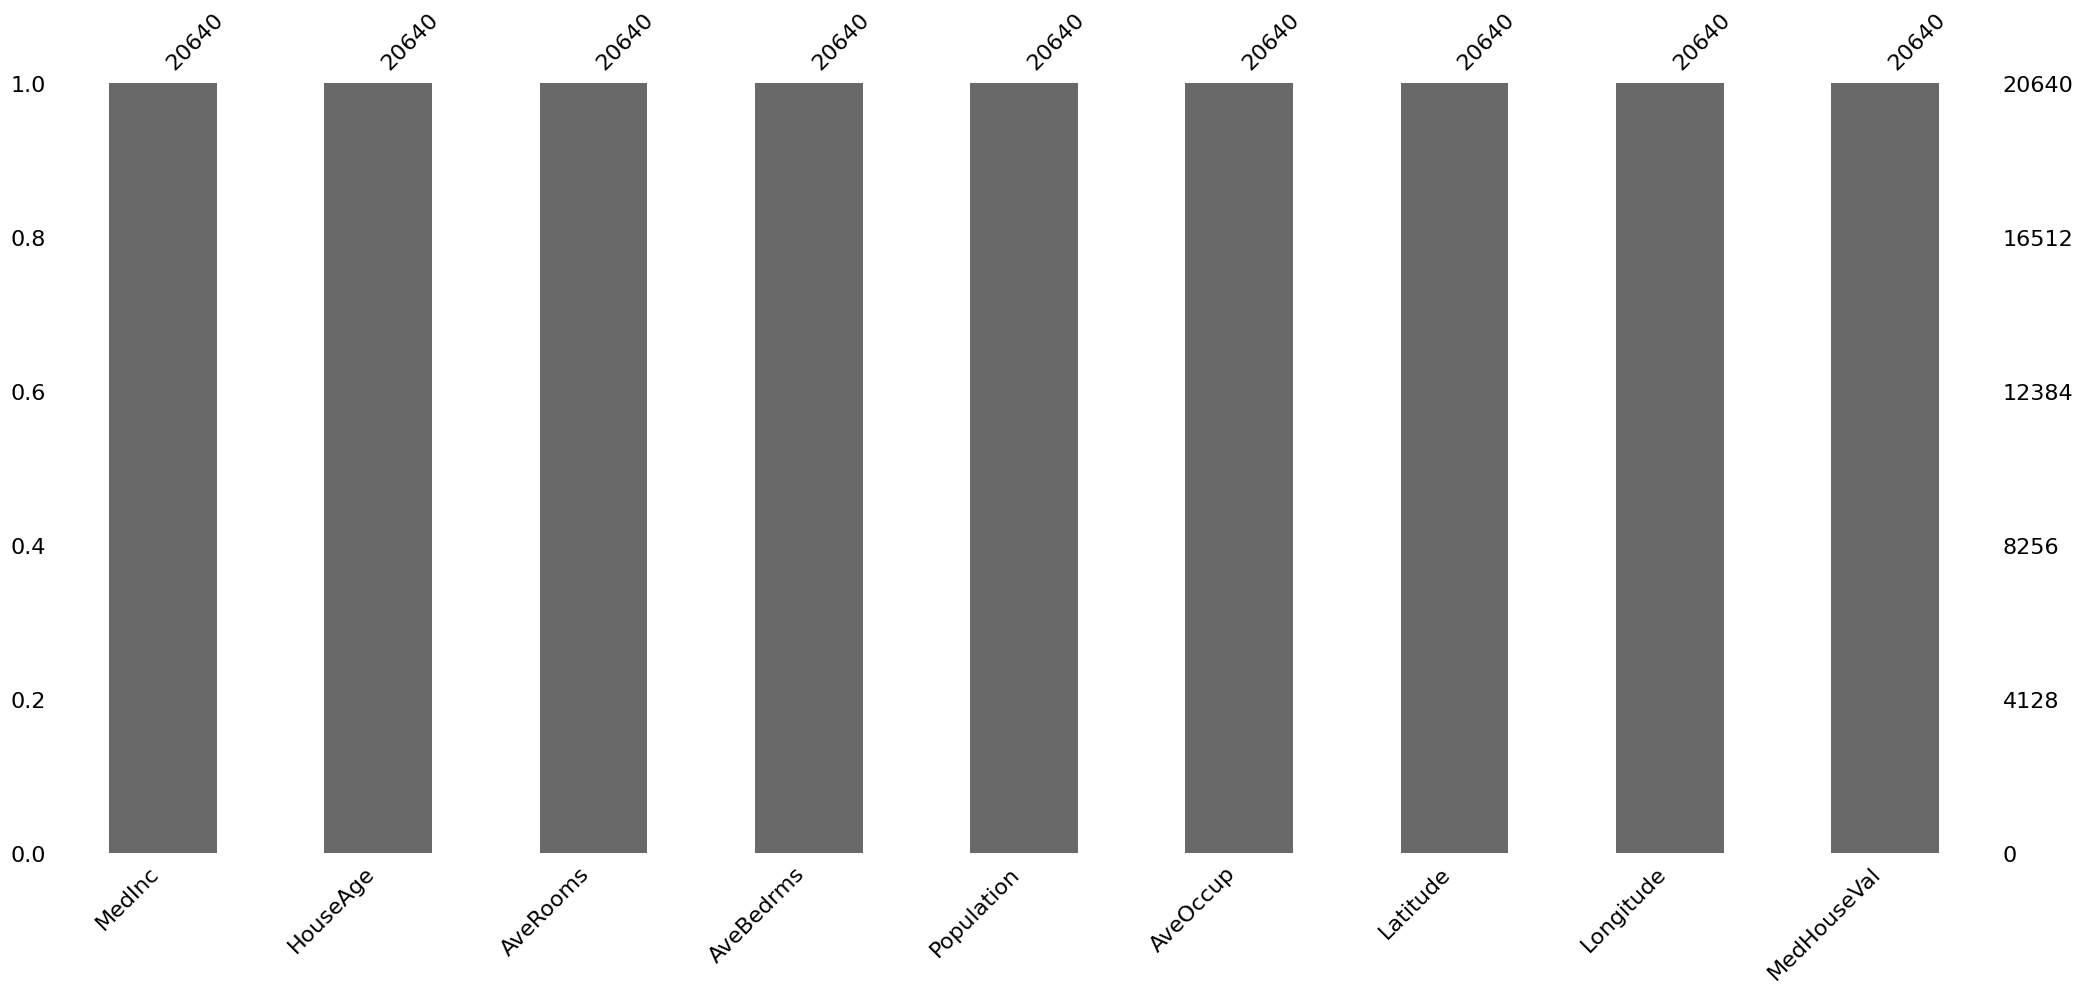

In [26]:
msno.bar(data)



El siguiente gráfico nos permite ver perdidos a nivel de filas


<Axes: >

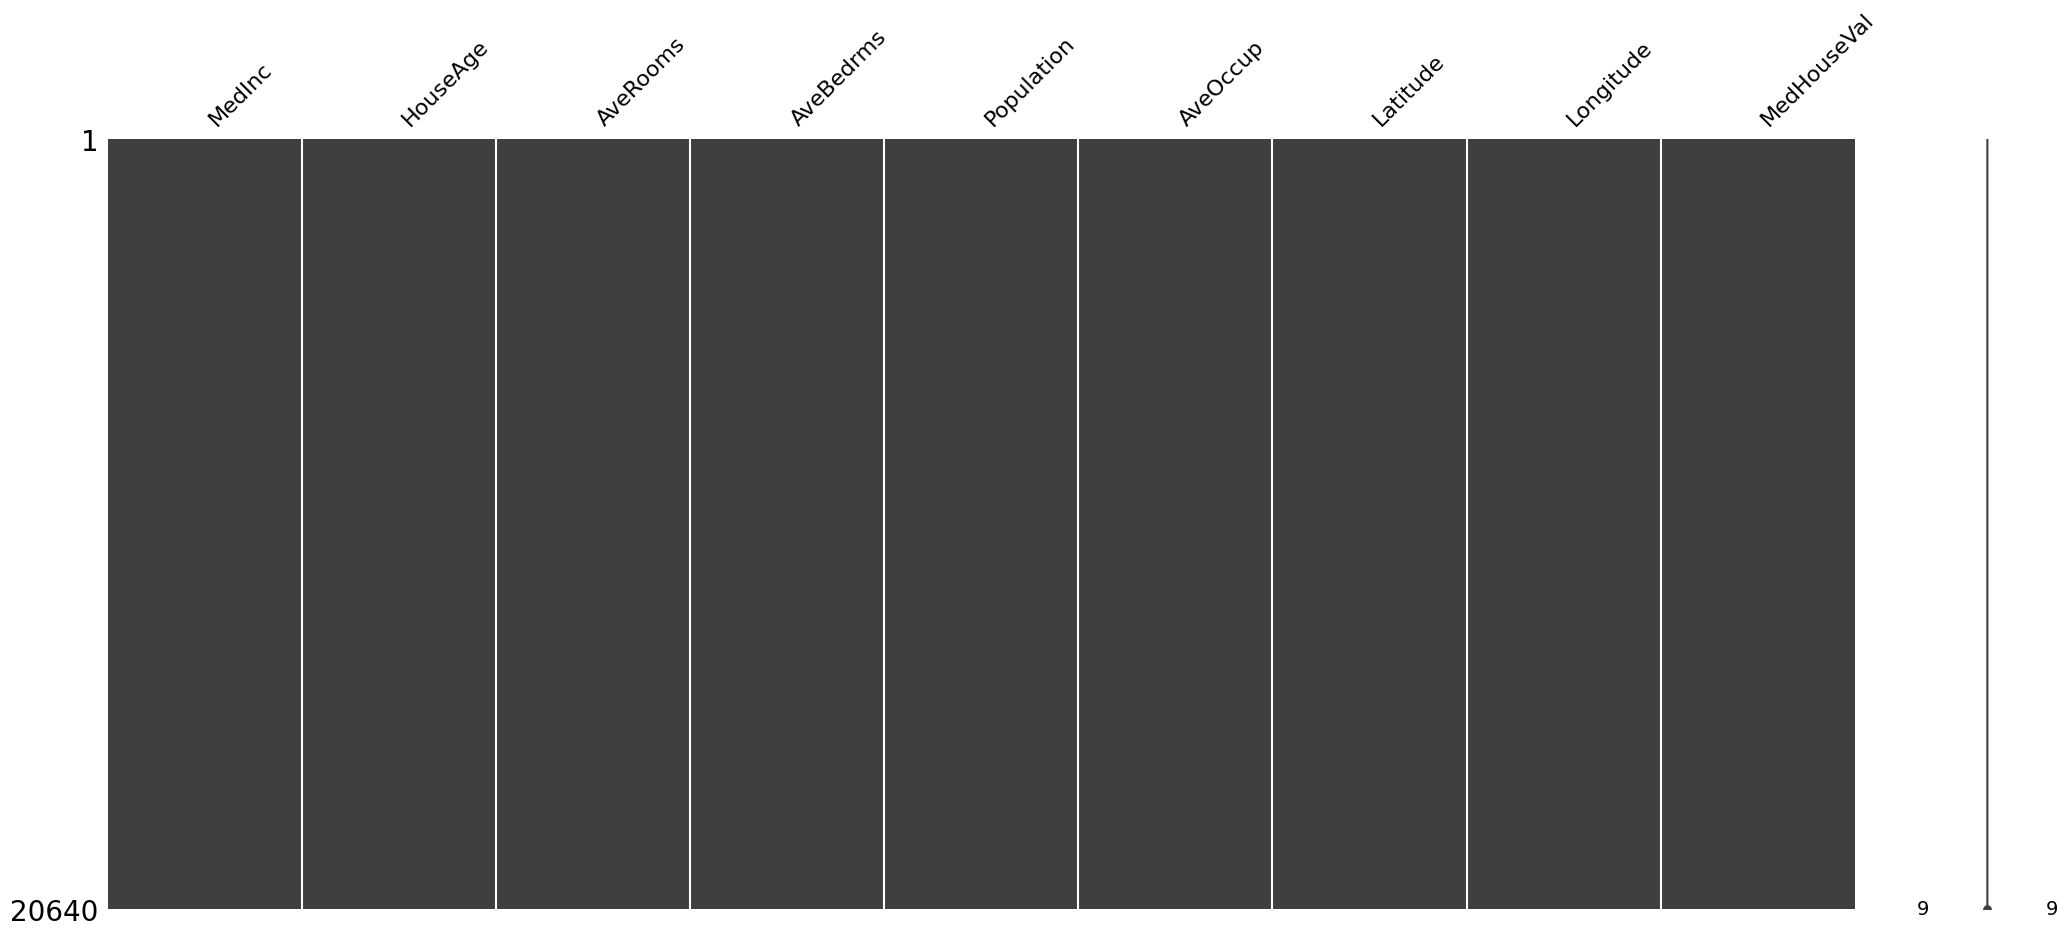

In [27]:
msno.matrix(data)

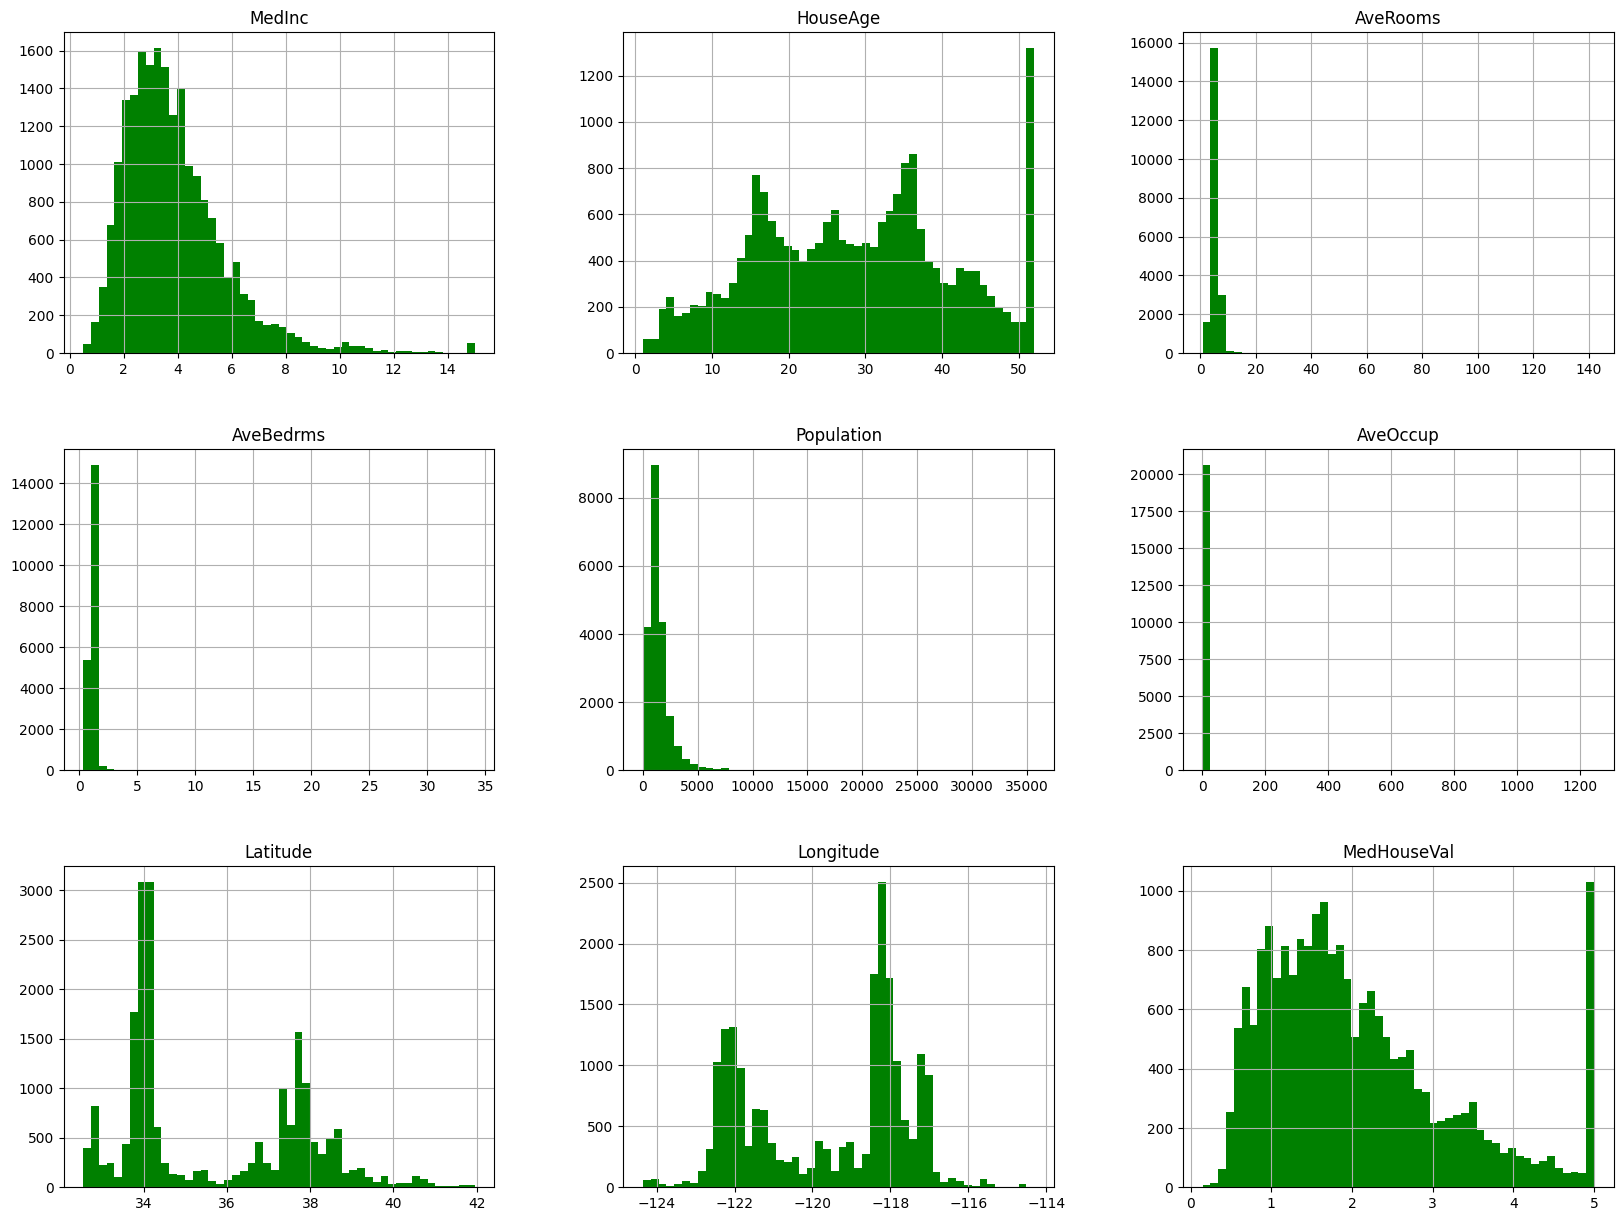

In [32]:
data.hist(bins=50,figsize=(20,15), color = 'green')
plt.show()


In [31]:
print(data.isnull().sum())     

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# CORRELATION ANALYSIS

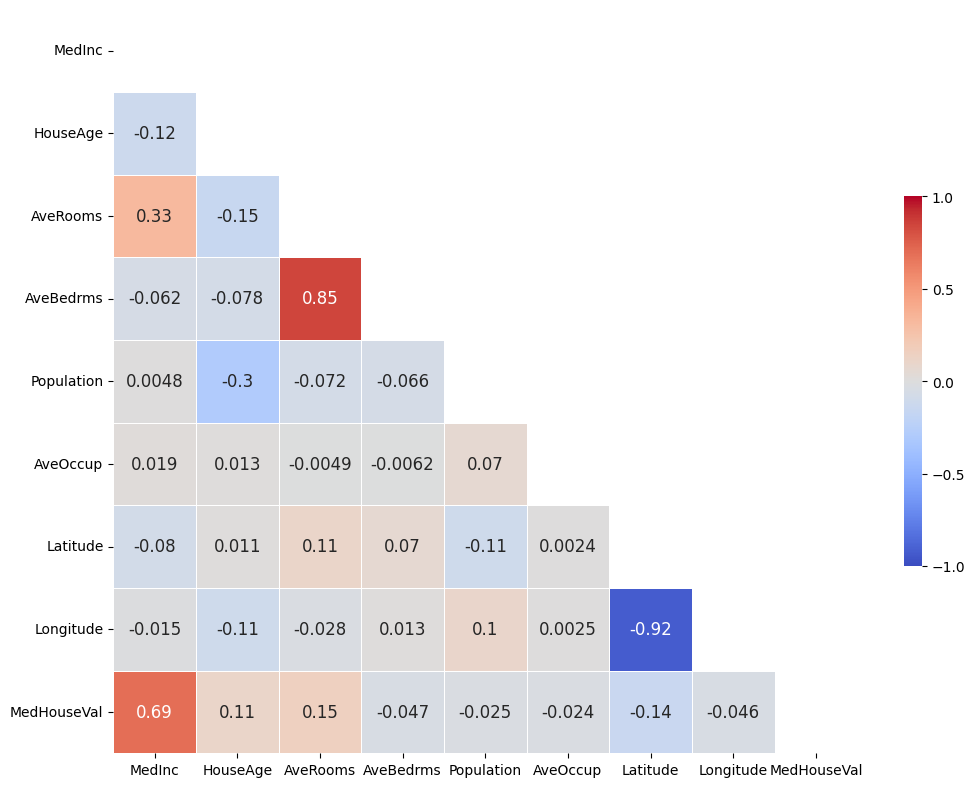

In [43]:

corr_matrix=data.corr(method='pearson')
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()



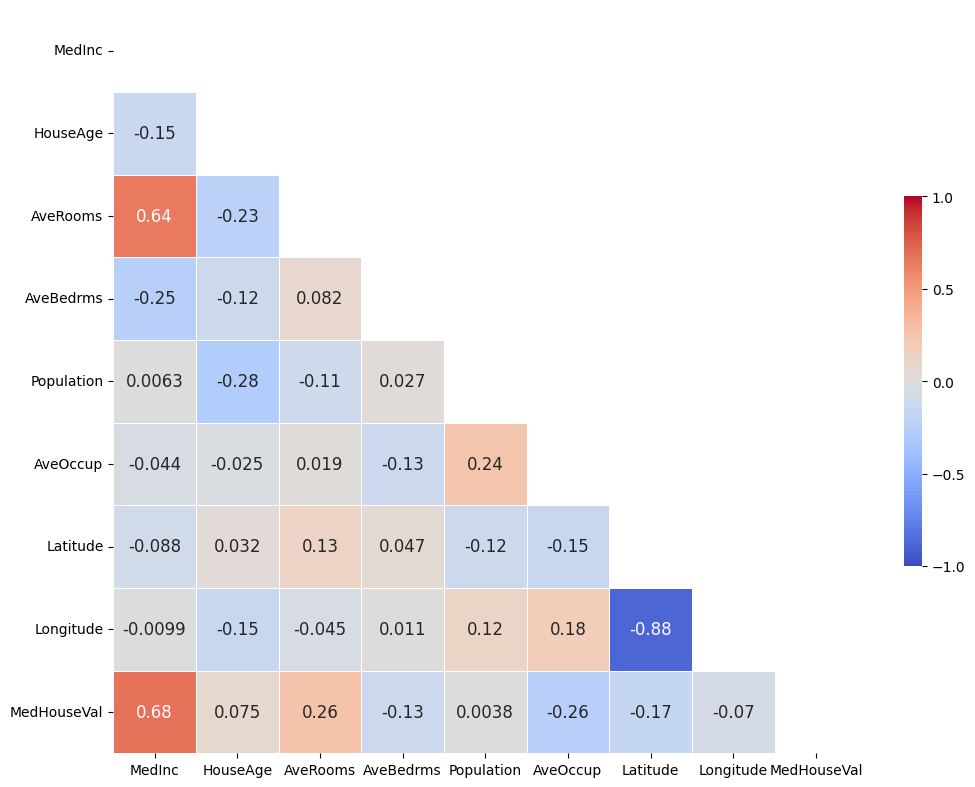

In [44]:
corr_matrix=data.corr(method='spearman')
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()

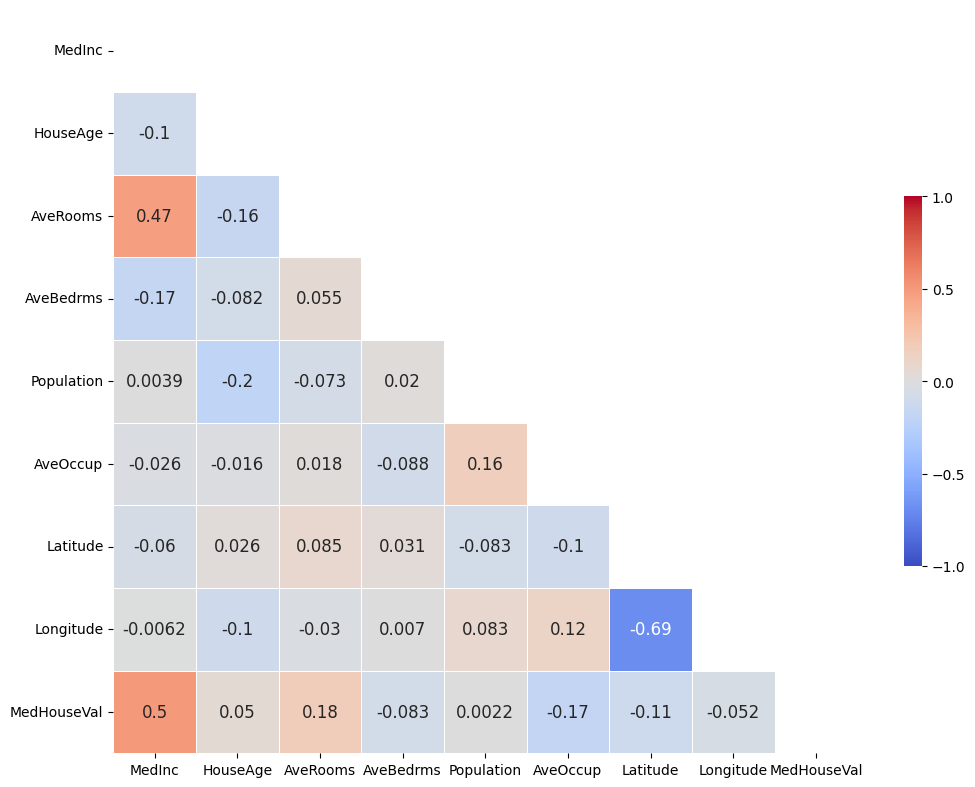

In [45]:
corr_matrix=data.corr(method='kendall')
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()

In statistical hypothesis testing, the null hypothesis (H0) is a statement that assumes there is no significant relationship or correlation between the variables of interest. When testing the significance of correlation using measures like Pearson's r, Spearman's rho, or Kendall's tau, the null hypothesis typically states that there is no correlation or that the correlation coefficient is equal to zero.

Formally, the null hypothesis for correlation can be stated as follows:

H0: The population correlation coefficient (ρ or τ) between the two variables is equal to zero.

In other words, the null hypothesis assumes that there is no systematic relationship or correlation between the variables being studied. The alternative hypothesis (Ha), on the other hand, suggests that there is a significant correlation present.

When performing a statistical test for correlation, such as calculating a p-value, we aim to determine whether the evidence from the sample data supports rejecting the null hypothesis in favor of the alternative hypothesis. The p-value represents the probability of obtaining a correlation coefficient as extreme as the one observed, assuming that the null hypothesis is true. If the p-value is below a predetermined significance level (commonly set at 0.05), we reject the null hypothesis and conclude that there is evidence of a significant correlation.

To summarize:

Null Hypothesis (H0): The population correlation coefficient between the variables is zero.
Alternative Hypothesis (Ha): The population correlation coefficient between the variables is not zero.
P-value: The probability of obtaining a correlation coefficient as extreme as the observed value, assuming the null hypothesis is true.

In [39]:
scipy.stats.pearsonr(data['AveBedrms'], data['AveRooms'])

PearsonRResult(statistic=0.8476213257130447, pvalue=0.0)

In [40]:
scipy.stats.spearmanr(data['AveBedrms'], data['AveRooms'])

SignificanceResult(statistic=0.08204579652709737, pvalue=3.616833396381869e-32)

In [41]:
scipy.stats.kendalltau(data['AveBedrms'], data['AveRooms'])

SignificanceResult(statistic=0.05521778040686254, pvalue=1.2302135249327313e-32)

In [46]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


array([[<Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='AveBedrms', ylabel='MedInc'>,
        <Axes: xlabel='Population', ylabel='MedInc'>,
        <Axes: xlabel='AveOccup', ylabel='MedInc'>,
        <Axes: xlabel='MedHouseVal', ylabel='MedInc'>,
        <Axes: xlabel='Latitude', ylabel='MedInc'>,
        <Axes: xlabel='Longitude', ylabel='MedInc'>],
       [<Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveBedrms', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='MedHouseVal', ylabel='HouseAge'>,
        <Axes: xlabel='Latitude', ylabel='HouseAge'>,
        <Axes: xlabel='Longitude', ylabel='HouseAge'>],
       [<Axes: xlabel='MedInc', yl

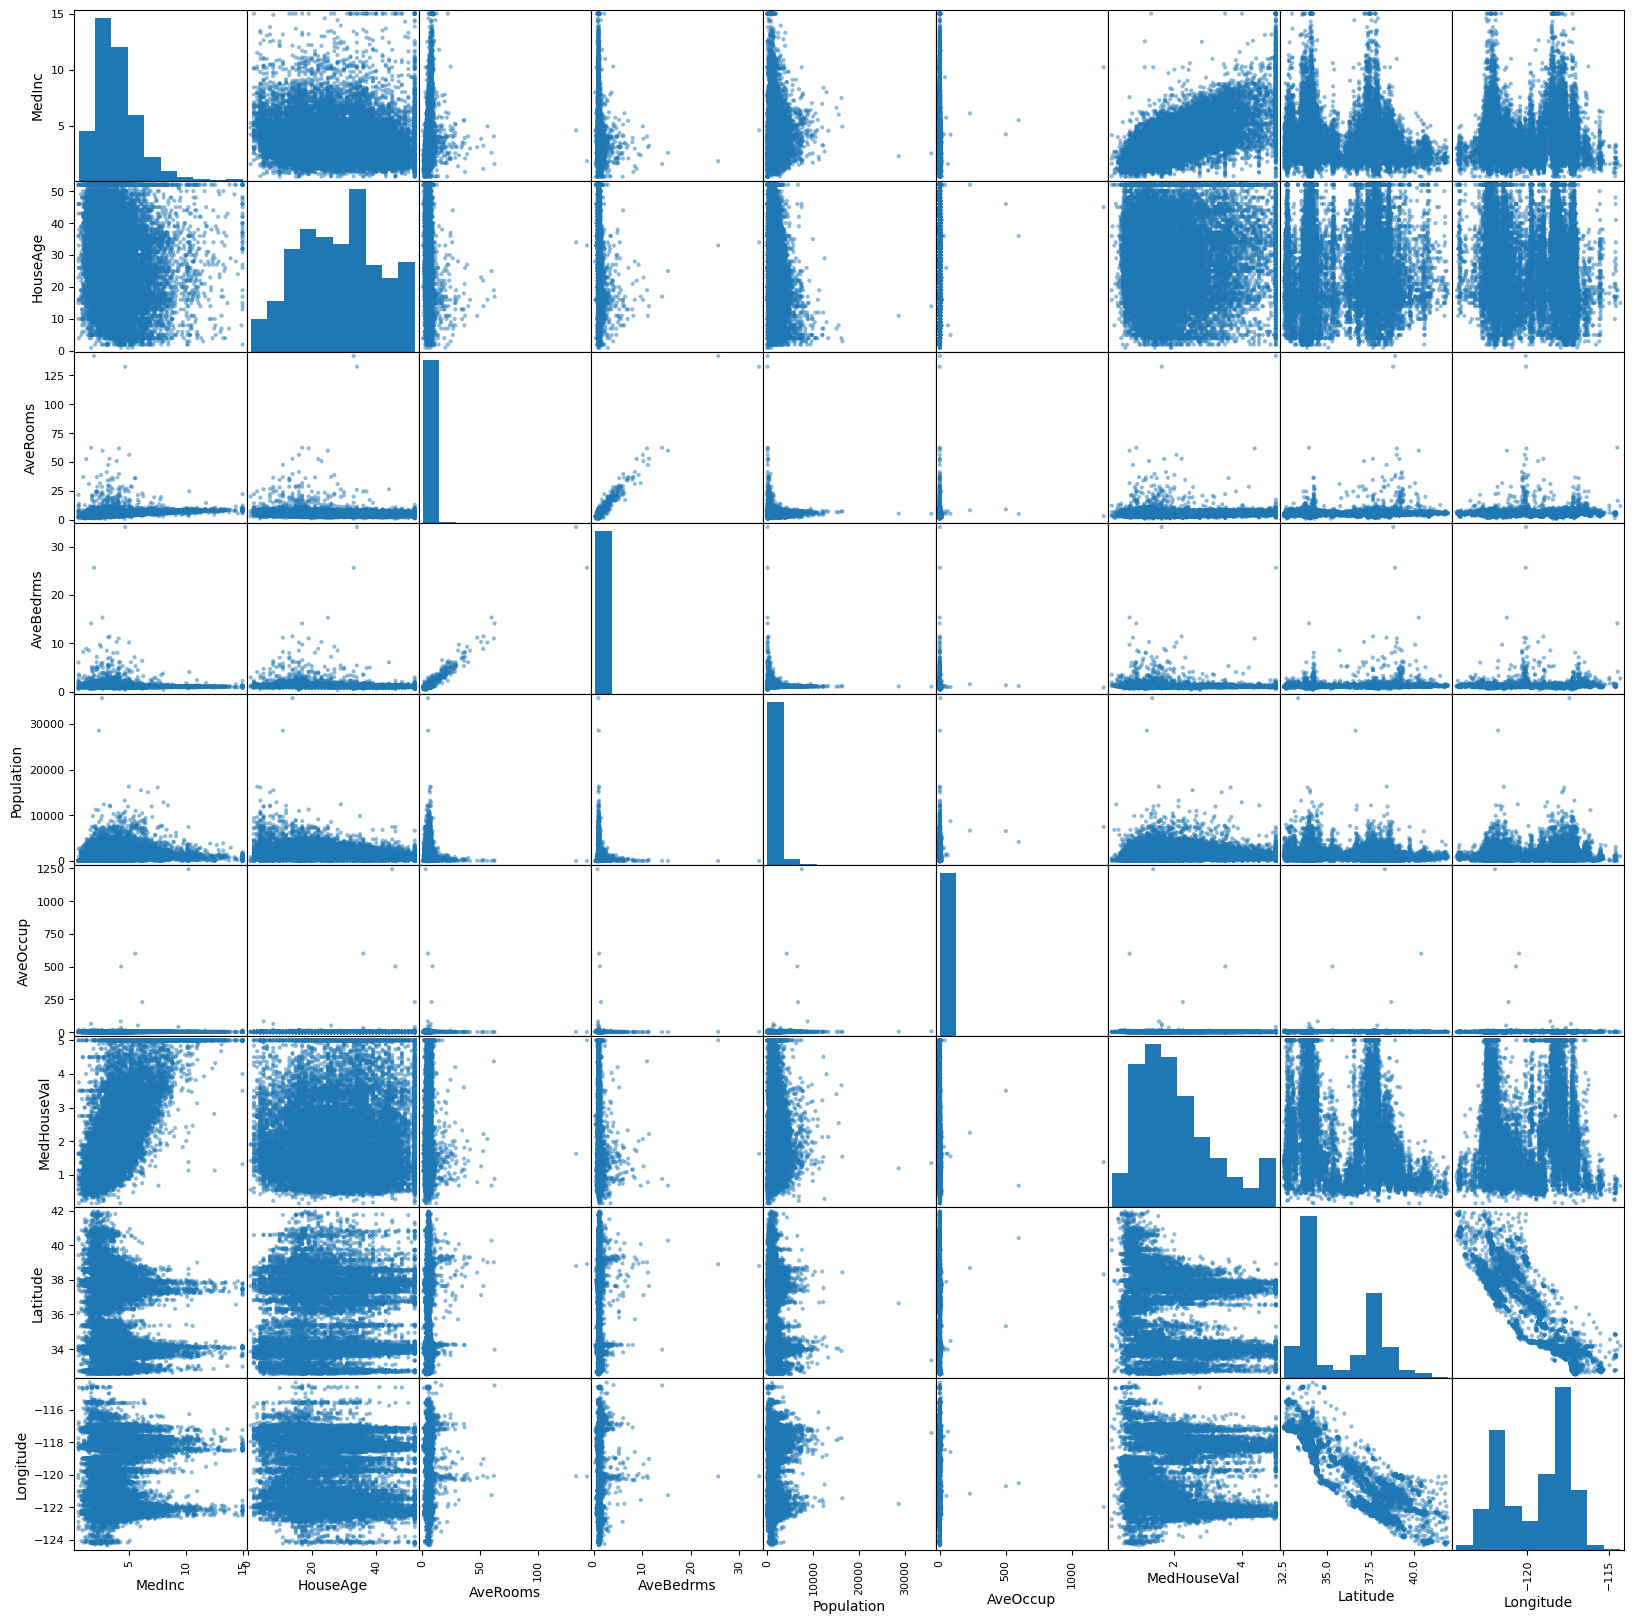

In [51]:


# other approach it to use the scatter plot in a A vs B fashion
# problem with this is that (for N features, there will be N^2 plots)

imp_attributes = ["MedInc", "HouseAge", "AveRooms", "AveBedrms",'Population','AveOccup','MedHouseVal','Latitude','Longitude']

from pandas.plotting import scatter_matrix

scatter_matrix(data[imp_attributes], figsize=(20, 20))



In [33]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


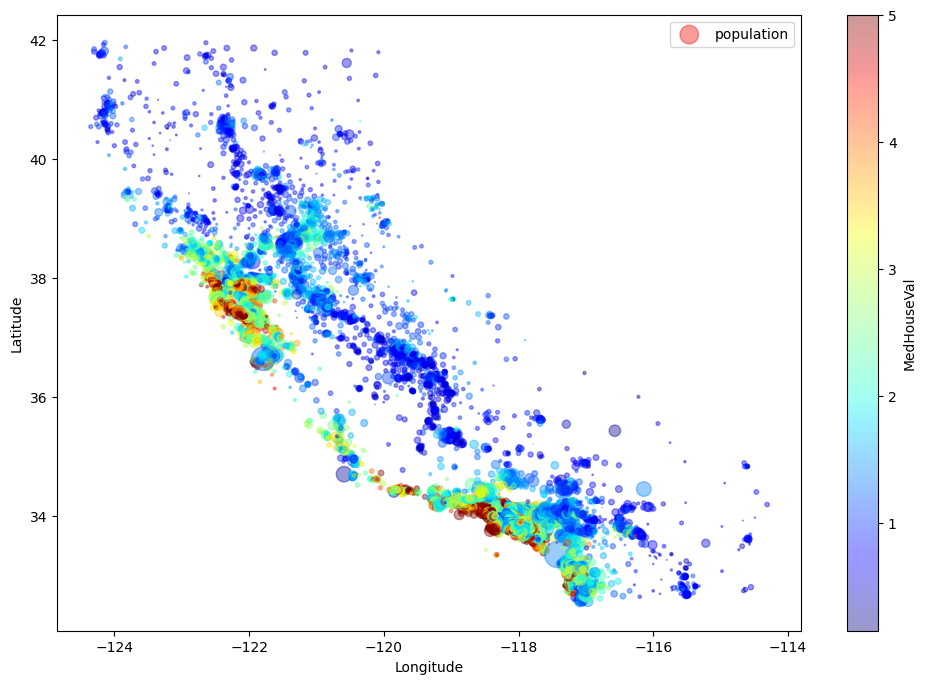

In [35]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
            s=data['Population']/100, label="population", figsize=(12,8),
            c="MedHouseVal", cmap=plt.get_cmap("jet"), sharex=False)

plt.legend()


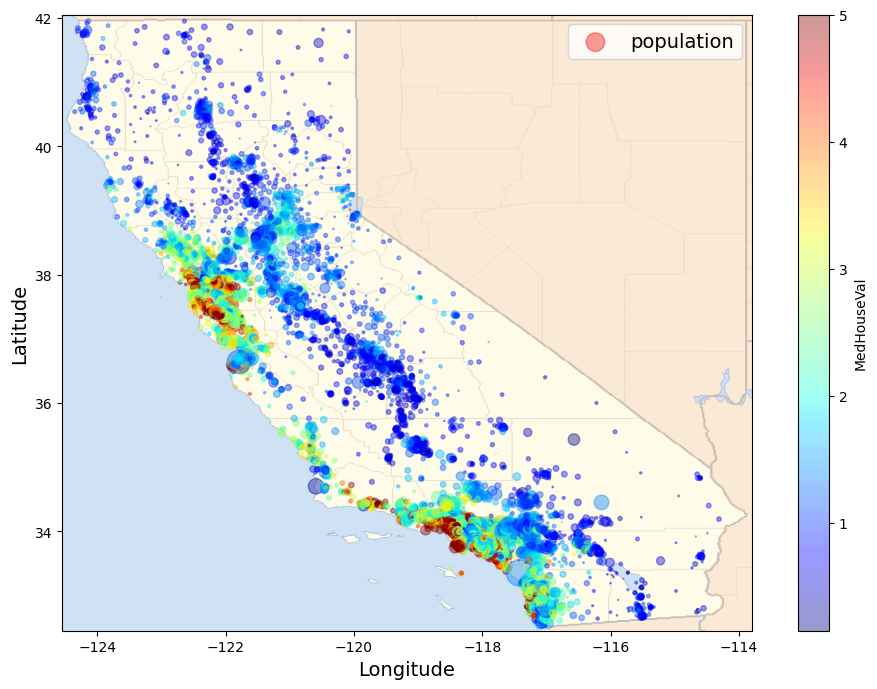

In [37]:


import matplotlib.image as mpimg

ax = data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
            s=data['Population']/100, label="population", figsize=(12,8),
            c="MedHouseVal", cmap=plt.get_cmap("jet"), sharex=False)

# load the png image
california_img = mpimg.imread("california.png")

plt.imshow(california_img, extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

